In [2]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline

In [4]:
#Resding our training and test data sets


test_data = pd.read_csv("/users/fara/ML_Repository/archive/cs-test.csv")
train_data = pd.read_csv("/users/fara/ML_Repository/archive/cs-training.csv")


In [6]:
test_data.sample(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1068,1069,NaN,0.053750,43,0,0.435391,4000.0,5,0,1,0,1.0
84322,84323,NaN,1.000000,48,1,0.115458,5750.0,2,2,0,0,2.0
37889,37890,NaN,0.098535,25,0,129.000000,0.0,4,0,0,0,0.0
16890,16891,NaN,0.000000,45,0,0.193062,11011.0,7,0,1,0,0.0
61434,61435,NaN,0.998756,49,10,3851.000000,NaN,19,0,0,3,3.0
95727,95728,NaN,0.296056,53,0,0.538824,2974.0,6,0,1,0,3.0
96330,96331,NaN,0.885936,59,0,0.099284,7261.0,6,0,0,0,1.0
12825,12826,NaN,0.015516,63,1,0.001506,2655.0,7,0,0,0,0.0
50693,50694,NaN,0.337161,56,0,3719.000000,NaN,9,0,2,0,3.0
74803,74804,NaN,0.496335,29,0,0.196182,3980.0,5,0,0,0,1.0


In [8]:
#Let's take a look at the data
train_data.sample(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
27011,27012,0,0.307465,42,0,1651.000000,NaN,12,0,2,0,0.0
113695,113696,0,0.265256,57,1,1216.000000,NaN,12,0,1,0,1.0
87393,87394,0,0.008224,64,0,1682.000000,NaN,19,1,1,0,0.0
122510,122511,0,0.000000,21,0,0.000000,1.0,2,0,0,0,0.0
138419,138420,0,0.056453,54,0,2009.000000,NaN,9,0,1,0,0.0
55624,55625,0,0.000000,57,0,0.178123,10823.0,7,0,1,0,2.0
91111,91112,0,0.035567,59,0,0.005199,5000.0,7,0,0,0,0.0
14207,14208,1,0.983494,38,0,0.975806,2975.0,9,0,1,0,0.0
1219,1220,0,0.142123,54,0,2859.000000,NaN,18,0,3,0,1.0
126309,126310,0,1.027139,33,0,0.580084,3333.0,5,0,1,0,1.0


### Exploratory Data Analysis

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

Null Values: We have many null values for MonthlyIncome and NumberOfDependents to handle. 
Inconsistent Data types: we will change them to int64. 

In [13]:
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [16]:
test_data.sample(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
67357,67358,NaN,0.187335,56,0,0.493239,8800.0,11,0,4,0,1.0
33573,33574,NaN,1.000000,48,1,0.512653,3516.0,2,1,2,0,3.0
74512,74513,NaN,0.009262,29,0,3278.000000,NaN,10,0,2,0,0.0
20193,20194,NaN,0.082328,65,0,1482.000000,NaN,6,0,1,0,0.0
77289,77290,NaN,0.013545,82,0,13.000000,NaN,6,0,0,0,0.0
55540,55541,NaN,0.075170,43,0,0.423077,2833.0,3,0,1,1,2.0
78760,78761,NaN,0.793876,39,0,0.418133,5966.0,6,0,2,0,0.0
27096,27097,NaN,0.250221,59,2,0.369715,4800.0,6,0,1,0,1.0
30508,30509,NaN,0.186727,64,0,1.004999,3600.0,14,0,1,0,0.0
44089,44090,NaN,0.211155,29,0,0.098510,5166.0,5,0,0,0,0.0


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [20]:
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


test data has null values to handle

### Data Cleaning

First, we will look at the distribution of our target class. SeriousDlqin2yrs to have some perspective about the problem.

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

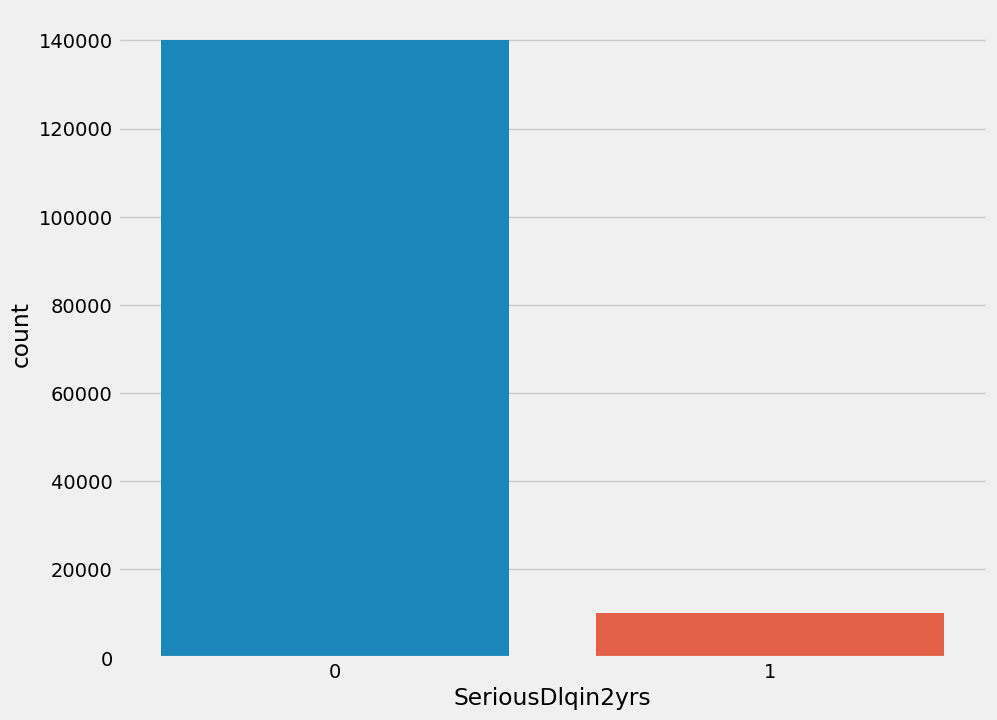

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x="SeriousDlqin2yrs", data=train_data)

we have an **unbalanced target class!!** we will check the event rate of financial distress (SeriousDlqin2yrs) in our dataset.

In [29]:
class_0 = train_data.SeriousDlqin2yrs.value_counts()[0]
class_1 = train_data.SeriousDlqin2yrs.value_counts()[1]
print("Total number of class_0: {}".format(class_0))
print("Total number of class_1: {}".format(class_1))
print("Event rate: {} %".format(class_1/(class_0+class_1) *100))

Total number of class_0: 139974
Total number of class_1: 10026
Event rate: 6.683999999999999 %


trainind data has an outlier in age feature which is 0,  impute it with the age median.

In [31]:
train_data.loc[train_data["age"] < 18] #less than legal age

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


only one instance, let's impute it right away.

In [33]:
train_data.loc[train_data["age"] == 0, "age"] = train_data.age.median()

We're done with the age feature, now we will go and impute missing values for the MonthlyIncome feature. We will tackle this differently by bracketing ages with the working (18 to 60) and senior (60 and above). First, let's create a temporary dataframes for them and compute for each's median then impute the values accordingly.

In [36]:
age_working = train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60)]
age_senior = train_data.loc[(train_data["age"] >= 60)]

age_working_impute = age_working.MonthlyIncome.mean()
age_senior_impute = age_senior.MonthlyIncome.mean()

We will change the monthlyincome data type to int64 then fill those null values with 99999 and impute with the corresponding age's monthlyincome mean.

In [39]:
train_data["MonthlyIncome"] = np.absolute(train_data["MonthlyIncome"])

In [41]:
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].fillna(99999)

In [43]:
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')

In [45]:
train_data.loc[((train_data["age"] >= 18) & (train_data["age"] < 60)) & (train_data["MonthlyIncome"] == 99999),\
               "MonthlyIncome"] = age_working_impute
train_data.loc[(train_data["age"] >= 60) & (train_data["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute

/var/folders/jr/xxslpcq16lz5qnd_zp2cqc1w0000gn/T/ipykernel_6502/2410769817.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6638.484232804233' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[((train_data["age"] >= 18) & (train_data["age"] < 60)) & (train_data["MonthlyIncome"] == 99999),\


In [47]:
#check
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [49]:
train_data.loc[train_data["MonthlyIncome"] == 99999]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


We're done with the Monthly Income, now we will move to the NumberOfDependents feature.

In [52]:
train_data["NumberOfDependents"] = np.absolute(train_data["NumberOfDependents"])
train_data["NumberOfDependents"] = train_data["NumberOfDependents"].fillna(0)
train_data["NumberOfDependents"] = train_data["NumberOfDependents"].astype('int64')

In [54]:
train_data.NumberOfDependents.value_counts()

NumberOfDependents
0     90826
1     26316
2     19522
3      9483
4      2862
5       746
6       158
7        51
8        24
10        5
9         5
20        1
13        1
Name: count, dtype: int64

I decided not to go through each of the numberofdependents feature and impute it by the mode. We will now take a look at the correlation of the features to the target variable.

<Axes: >

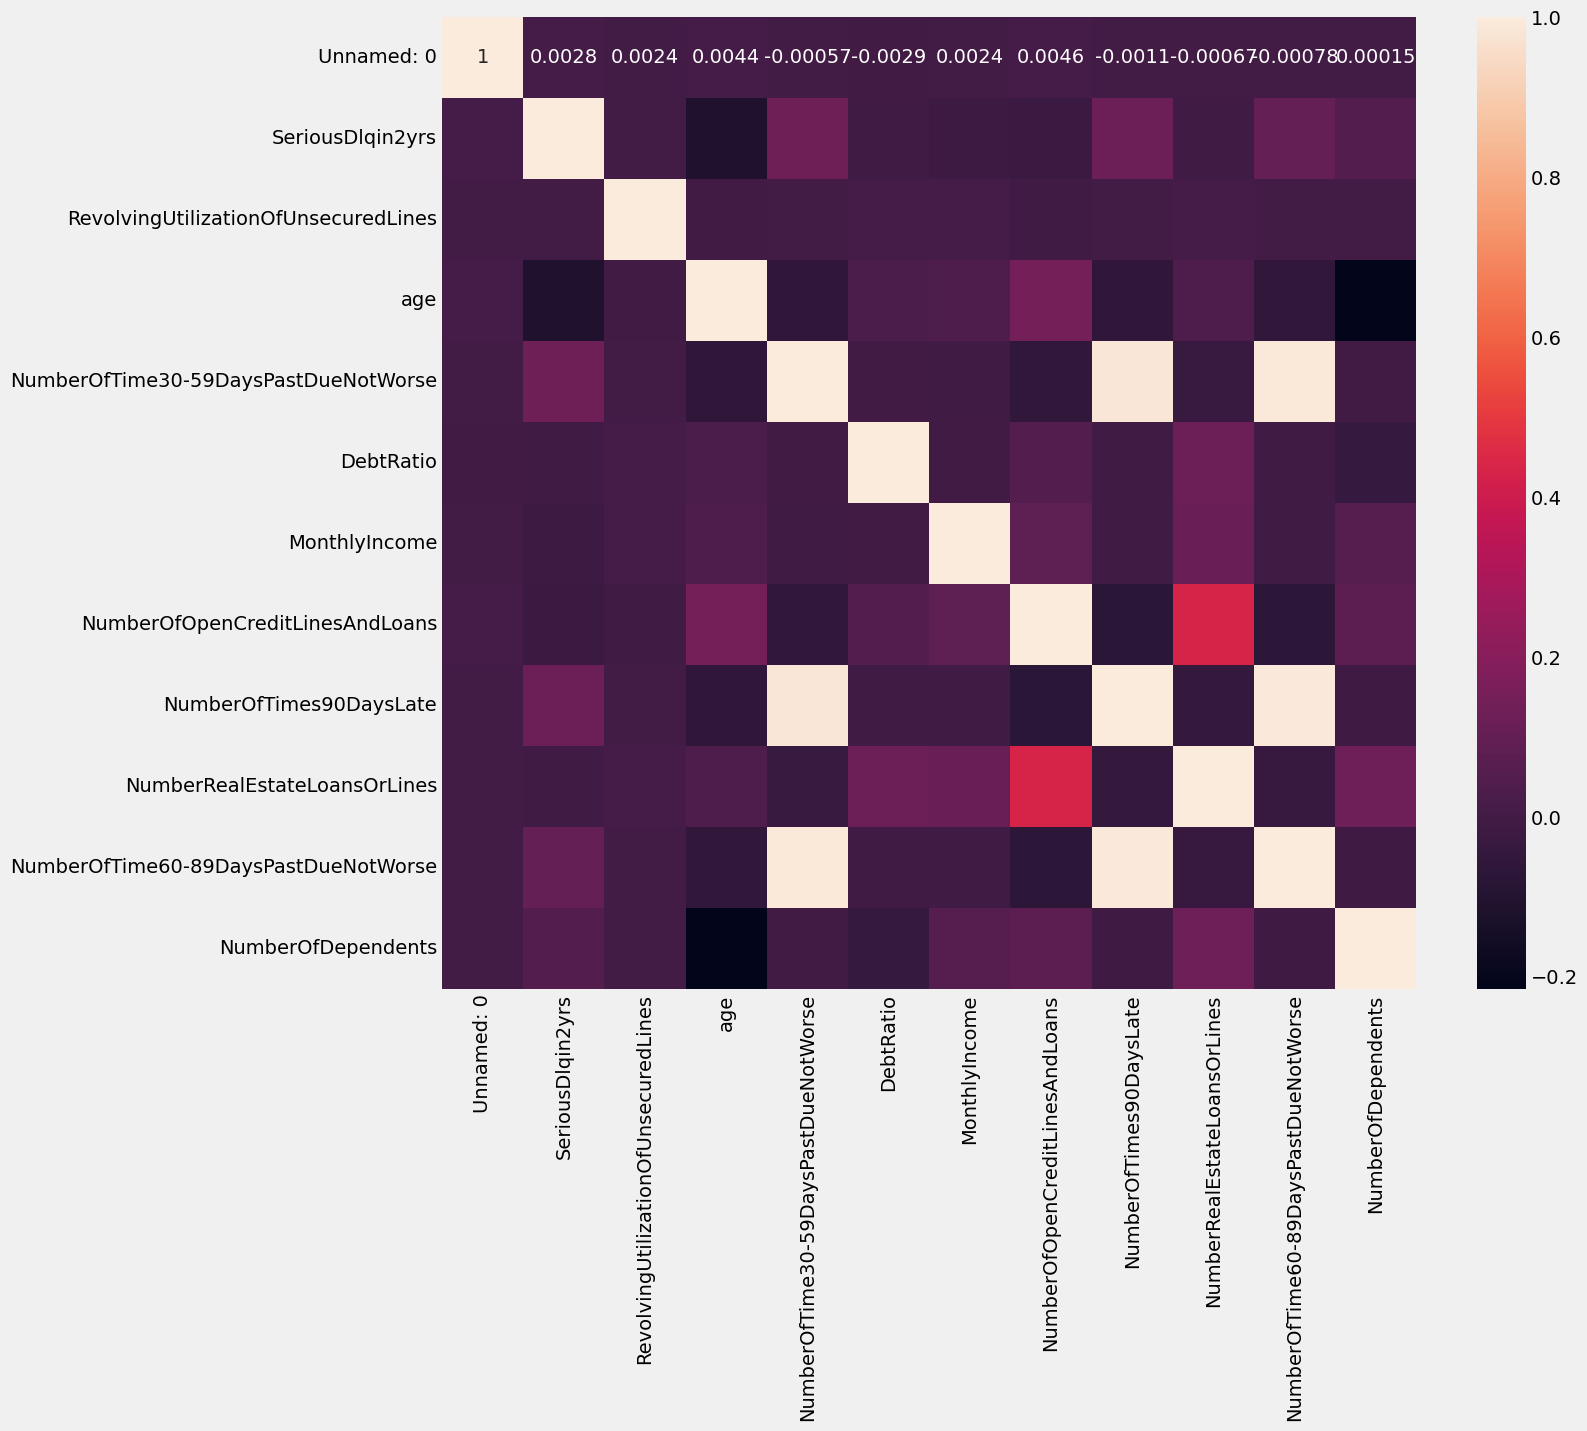

In [57]:
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

We will go with feature engineering the pastdue/late features (because a default is a default!) and credit/loans features but providing a buffer since debts are everywhere!

In [61]:
train_data["CombinedDefaulted"] = (train_data["NumberOfTimes90DaysLate"] + train_data["NumberOfTime60-89DaysPastDueNotWorse"])\
                                        + train_data["NumberOfTime30-59DaysPastDueNotWorse"]

In [63]:
train_data.loc[(train_data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

In [65]:
train_data["CombinedCreditLoans"] = train_data["NumberOfOpenCreditLinesAndLoans"] + \
                                        train_data["NumberRealEstateLoansOrLines"]

In [67]:
train_data.loc[(train_data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
train_data.loc[(train_data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

In [69]:
train_data.CombinedCreditLoans.value_counts()

CombinedCreditLoans
1    111375
0     38625
Name: count, dtype: int64

Next, we will create a binary feature WithDependents which is derived from the NumberOfDependents feature. Also, from the description of the data DebtRatio = Monthly debt payments / monthly gross income. we will extract MonthlyDebtPayments from this formula to get a new feature.

In [72]:
train_data["WithDependents"] = train_data["NumberOfDependents"]
train_data.loc[(train_data["WithDependents"] >= 1), "WithDependents"] = 1

In [74]:
train_data.WithDependents.value_counts()

WithDependents
0    90826
1    59174
Name: count, dtype: int64

In [76]:
train_data["MonthlyDebtPayments"] = train_data["DebtRatio"] * train_data["MonthlyIncome"]
train_data["MonthlyDebtPayments"] = np.absolute(train_data["MonthlyDebtPayments"])
train_data["MonthlyDebtPayments"] = train_data["MonthlyDebtPayments"].astype('int64')

In [78]:
train_data["age"] = train_data["age"].astype('int64')
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')

Also, let's see if we can get a good predictor out of age feature. using senior and working temporary dataframes earlier.

In [81]:
train_data["age_map"] = train_data["age"]
train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60), "age_map"] = 1
train_data.loc[(train_data["age"] >= 60), "age_map"] = 0 

In [83]:
#replacing those numbers to categorical features then get the dummy variables
train_data["age_map"] = train_data["age_map"].replace(0, "working")
train_data["age_map"] = train_data["age_map"].replace(1, "senior")

In [85]:
train_data = pd.concat([train_data, pd.get_dummies(train_data.age_map,prefix='is')], axis=1)

Now let's look at the correlation matrix to decide to retain or drop the engineered features (avoiding multicollinearity).

In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  int64  
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

<Axes: >

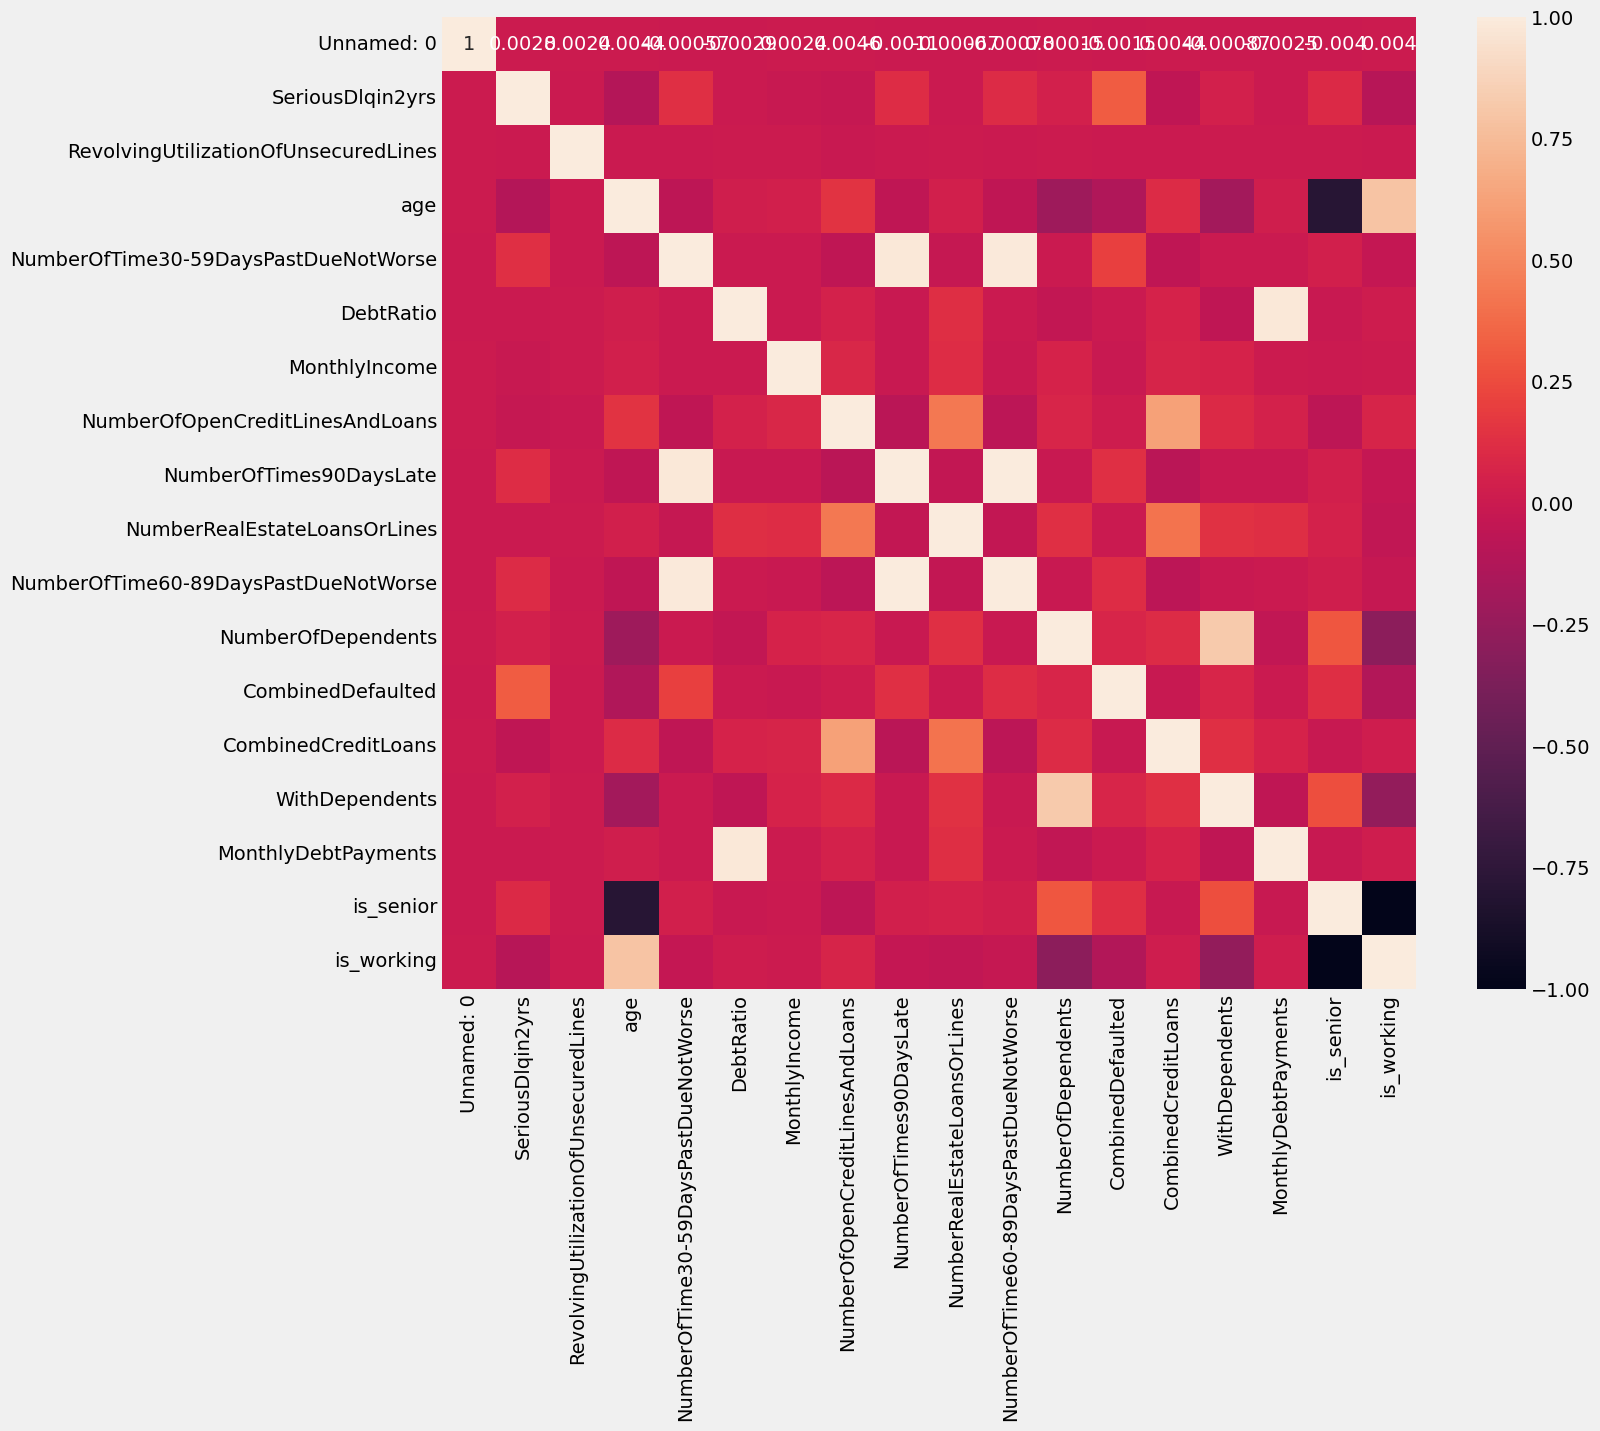

In [95]:
corr = train_data.corr(numeric_only=True)
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

Findings: 
* we will retain CombinedDefaulted feature as it clearly a good predictor of our target class than the three features it was derived from.
* we will retain NumberOfTime30-59DaysPastDueNotWorse and drop the other two features derived from CombinedDefaulted as it gives a more meaningful information on our target variable (also, it looks like this is the medium range of time a borrower defaulted a payment)
* we will drop the engineered is_working and is_senior feature since age feature outperforms them.
* we will drop also the WithDependents
* we will retain CombinedCreditLoans also since it outperforms the two features it came from.
* we will drop MonthlyDebtPayments


In [97]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans',
       'WithDependents', 'MonthlyDebtPayments', 'age_map', 'is_senior',
       'is_working'],
      dtype='object')

In [99]:
train_data.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",\
                 "WithDependents","age_map","is_senior","is_working", "MonthlyDebtPayments"], axis=1, inplace=True)

In [101]:
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

<Axes: >

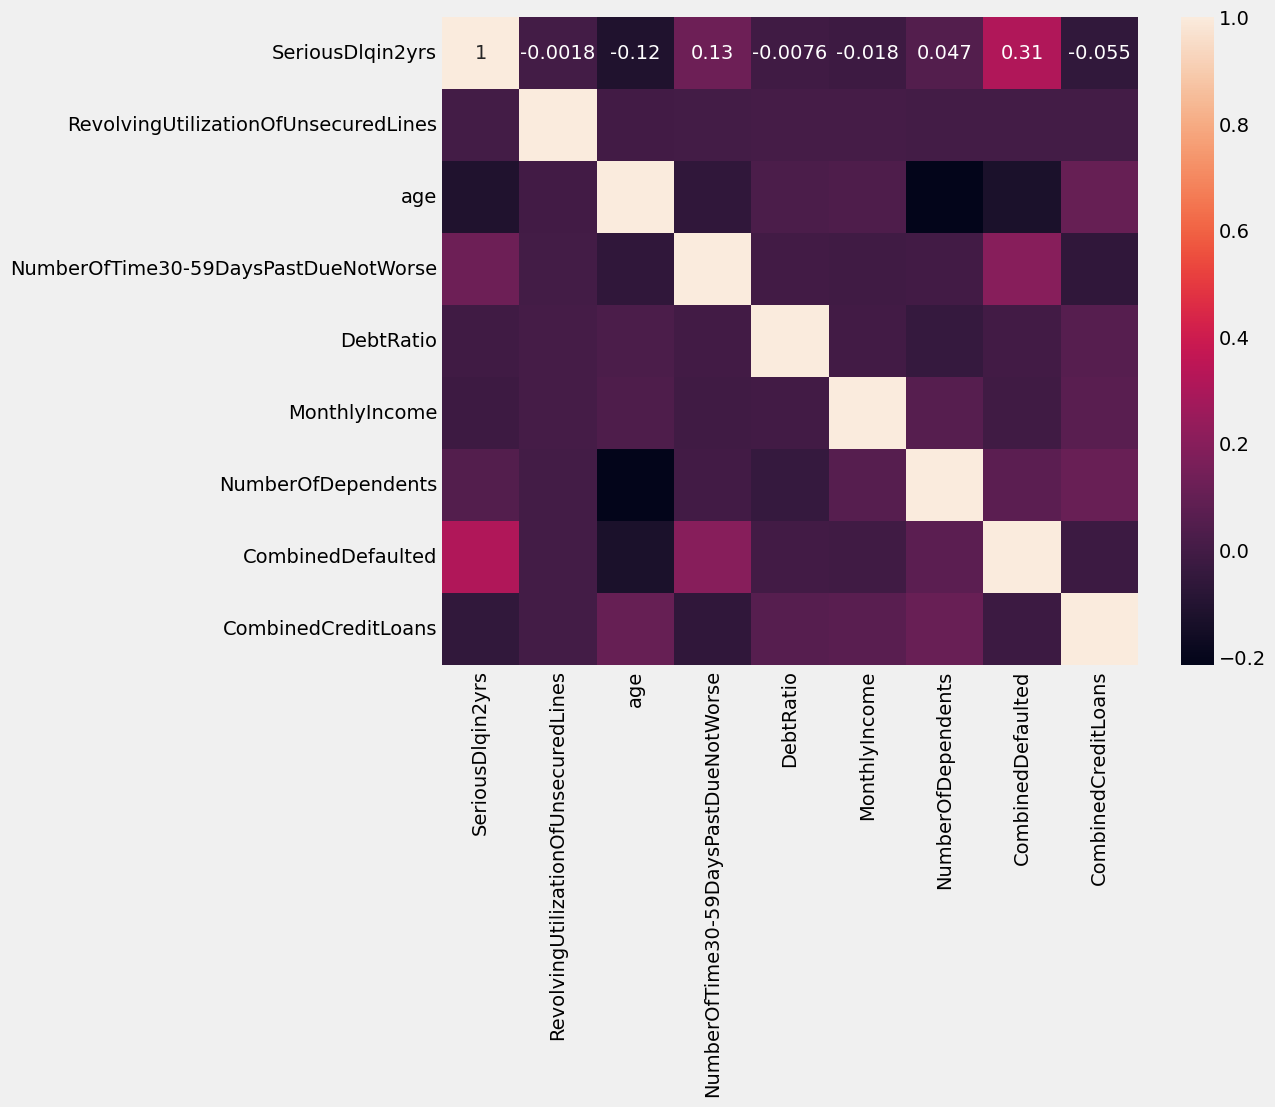

In [103]:
#now let's take a look at the filtered final features to be used in predicting the financial distress for the next two years
corr = train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

Now we have a clean dataset to make predictions!!

Now let's also clean the test set! Since we have concluded what features to retain and drop. we will skip some of the process.

In [107]:
def cleaned_dataset(dataset):
    dataset.loc[dataset["age"] <= 18, "age"] = dataset.age.median()
    
    age_working = dataset.loc[(dataset["age"] >= 18) & (dataset["age"] < 60)]
    age_senior = dataset.loc[(dataset["age"] >= 60)]

    age_working_impute = age_working.MonthlyIncome.mean()
    age_senior_impute = age_senior.MonthlyIncome.mean()

    dataset["MonthlyIncome"] = np.absolute(dataset["MonthlyIncome"])
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].fillna(99999)
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].astype('int64')

    dataset.loc[((dataset["age"] >= 18) & (dataset["age"] < 60)) & (dataset["MonthlyIncome"] == 99999),\
                   "MonthlyIncome"] = age_working_impute
    dataset.loc[(train_data["age"] >= 60) & (dataset["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute
    dataset["NumberOfDependents"] = np.absolute(dataset["NumberOfDependents"])
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].fillna(0)
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].astype('int64')

    dataset["CombinedDefaulted"] = (dataset["NumberOfTimes90DaysLate"] + dataset["NumberOfTime60-89DaysPastDueNotWorse"])\
                                            + dataset["NumberOfTime30-59DaysPastDueNotWorse"]

    dataset.loc[(dataset["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

    dataset["CombinedCreditLoans"] = dataset["NumberOfOpenCreditLinesAndLoans"] + \
                                            dataset["NumberRealEstateLoansOrLines"]
    dataset.loc[(dataset["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
    dataset.loc[(dataset["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

    dataset.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse"], axis=1, inplace=True)

cleaned_dataset(test_data)

/var/folders/jr/xxslpcq16lz5qnd_zp2cqc1w0000gn/T/ipykernel_6502/2823152905.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6596.628562971217' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[((dataset["age"] >= 18) & (dataset["age"] < 60)) & (dataset["MonthlyIncome"] == 99999),\


In [109]:
test_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [111]:
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [113]:
train_data.shape, test_data.shape

((150000, 9), (101503, 9))

In [115]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfDependents                    101503 non-null  int64  
 7   CombinedDefaulted                     101503 non-null  int64  
 8   CombinedCreditLoans                   101503 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 7.0 MB


In [117]:
#Let's split our predictors and the target variable in our datasets
X = train_data.drop("SeriousDlqin2yrs", axis=1).copy()
y = train_data.SeriousDlqin2yrs
X.shape, y.shape

((150000, 8), (150000,))

In [119]:
X_test = test_data.drop("SeriousDlqin2yrs", axis=1).copy()
y_test = test_data.SeriousDlqin2yrs
X_test.shape, y_test.shape

((101503, 8), (101503,))

In [121]:
#let's first try the penalized model Logit by providing the class_weight="balanced" parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict #to perform stratified sampling using cv param
from sklearn.metrics import roc_curve, roc_auc_score #AUC score
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)
logit = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
scaler = StandardScaler().fit(X_train)

Since we have a vast amount of data, we will use solver="saga" from logit and apply preprocessing of the input data using StandardScaler. class_weight="balanced" and a regularization param C to the default value of 1

In [124]:
X_train_scaled = scaler.transform(X_train) #scaling features!
X_val_scaled = scaler.transform(X_val)

In [126]:
logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

In [128]:
#lets make a roc_curve visualization
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score 0.8037465799063744


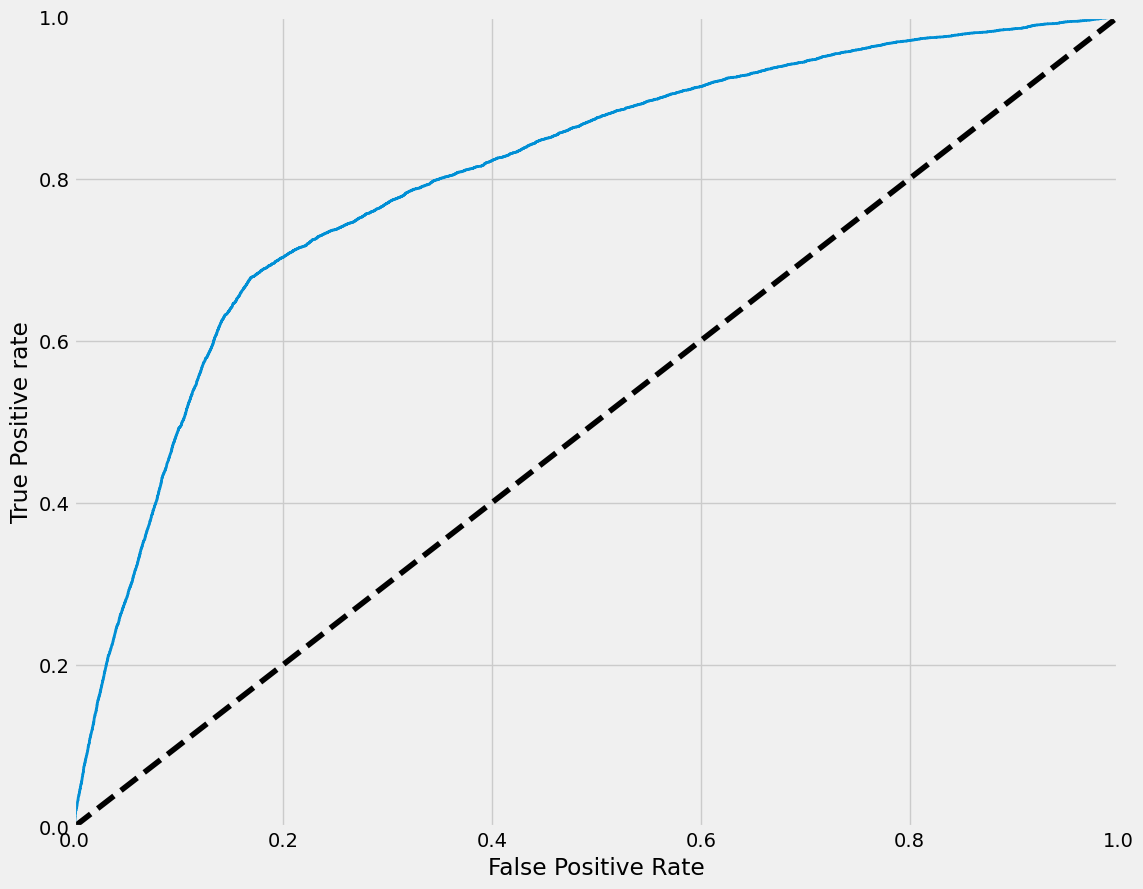

In [130]:
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))

AUC Score 0.8011665203065631


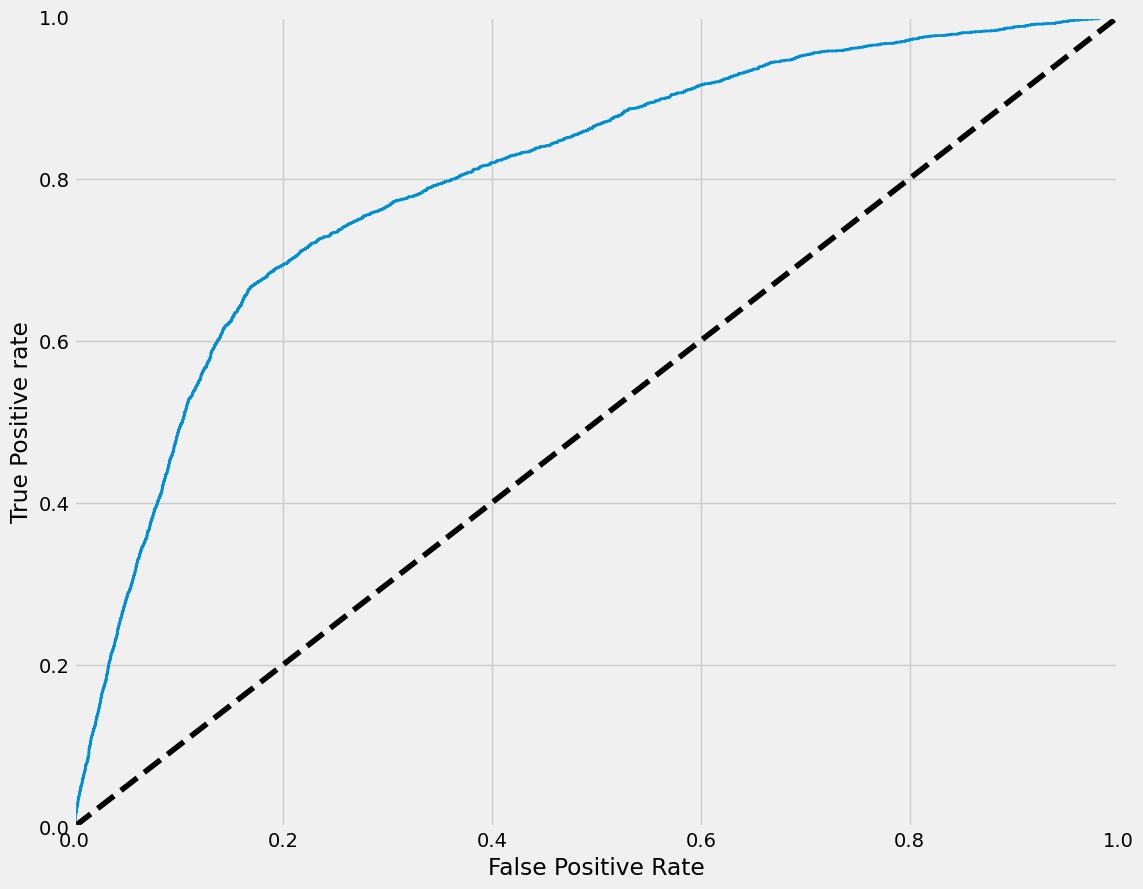

In [132]:
#validate with the validation set
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_val, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("AUC Score {}".format(roc_auc_score(y_val,logit_scores_val)))

With logistic regression we have an AUC score of .80, not bad! let's try tuning the parameters to see if we can improve our score. we will try setting a different regularization factor and setting max_iteration to 1000. 

In [135]:
logit_C_low = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=0.001, max_iter=1000)
logit_C_low.fit(X_train_scaled, y_train)
logit_C_low_scores_proba = logit_C_low.predict_proba(X_train_scaled)
logit_C_low_scores = logit_C_low_scores_proba[:,1]
fpr_logit_C_low, tpr_logit_C_low, thresh_logit_C_low = roc_curve(y_train, logit_C_low_scores)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_low_scores)))

AUC Score 0.8022986302726433


In [137]:
logit_C_high = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1000, max_iter=1000)
logit_C_high.fit(X_train_scaled, y_train)
logit_C_high_scores_proba = logit_C_high.predict_proba(X_train_scaled)
logit_C_high_scores = logit_C_high_scores_proba[:,1]
fpr_logit_C_high, tpr_logit_C_high, thresh_logit_C_high = roc_curve(y_train, logit_C_high_scores)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_high_scores)))

AUC Score 0.8037479212822443


Lets visualize all of them at once!

Text(0, 0.5, 'True Positive rate')

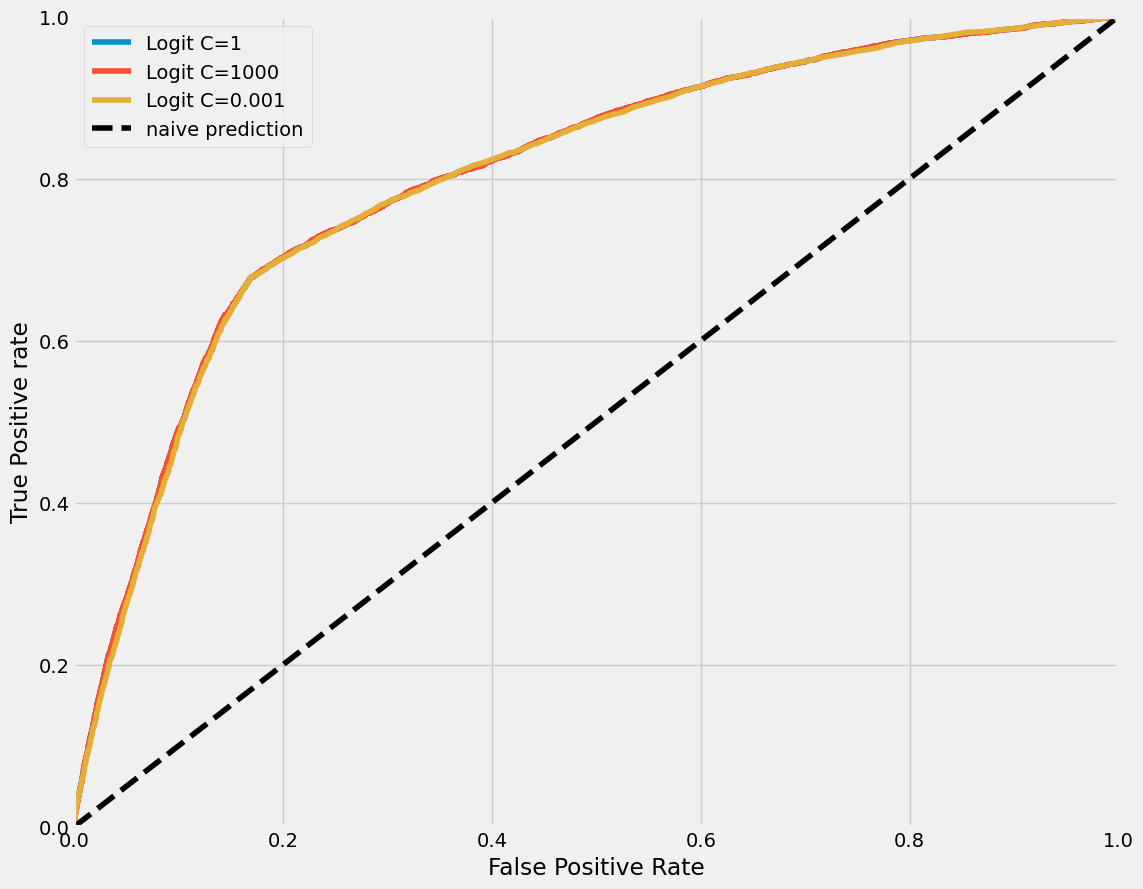

In [140]:
#lets make a roc_curve visualization
plt.figure(figsize=(12,10))
plt.plot(fpr_logit, tpr_logit, label="Logit C=1")
plt.plot(fpr_logit_C_high, tpr_logit_C_high , label="Logit C=1000")
plt.plot(fpr_logit_C_low, tpr_logit_C_low , label="Logit C=0.001")
plt.plot([0,1],[0,1], "k--", label="naive prediction")
plt.axis([0,1,0,1])
plt.legend(loc="best")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

Adjusting the C parameter don't mean much for our classifier to improve it's score.

One way to improve our score  is to use ensembling models.  First, we will use RandomForests and will try GradientBoostingClassifier and compare their scores.

AUC Score 0.8526833850127096


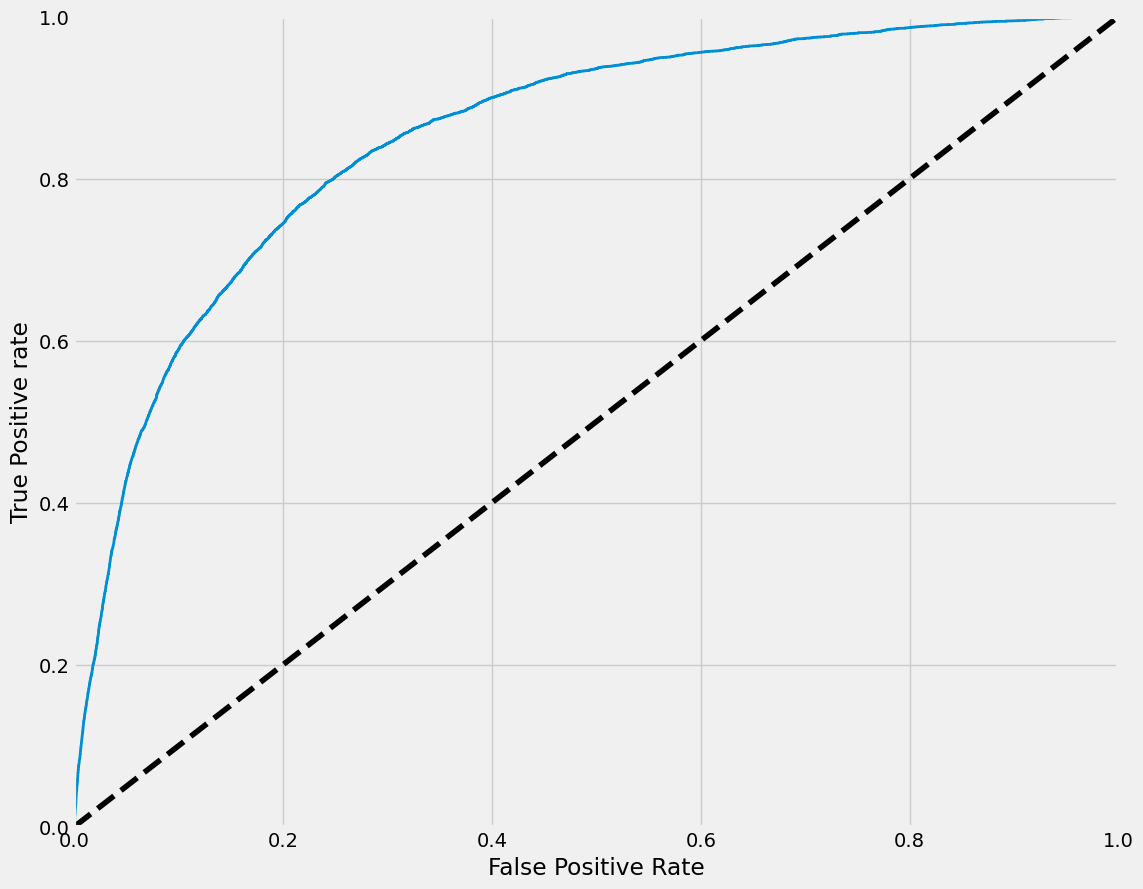

In [165]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(random_state=42,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) 
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores))) 

AUC Score 0.8489658267182891


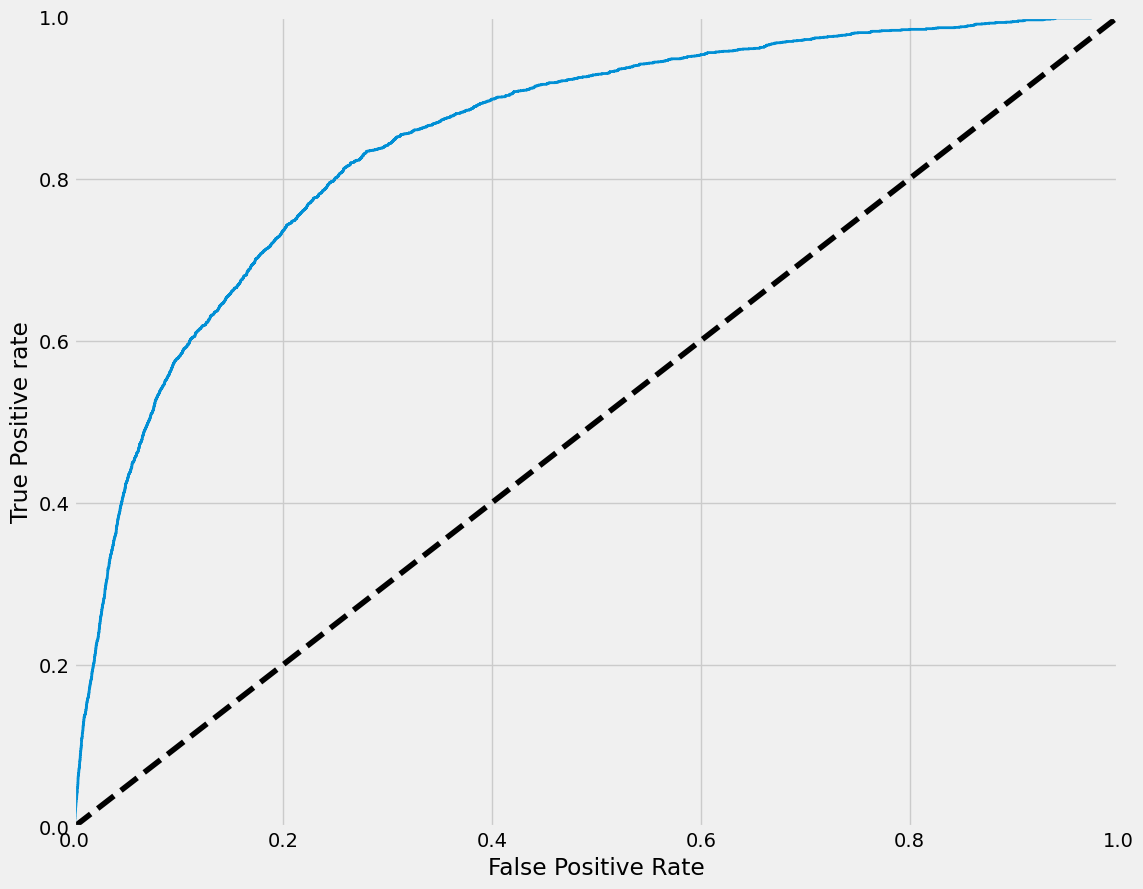

In [167]:
#Let's cross validate
y_val_proba = forest.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

Let's see how the random forest classifier treat each of the features, here, the randomforest gives a huge importance for the CombinedDefaulted feature and the RevolvingUtilizationOfUnsecuredLines and almost disgregard the other features in its predictions.

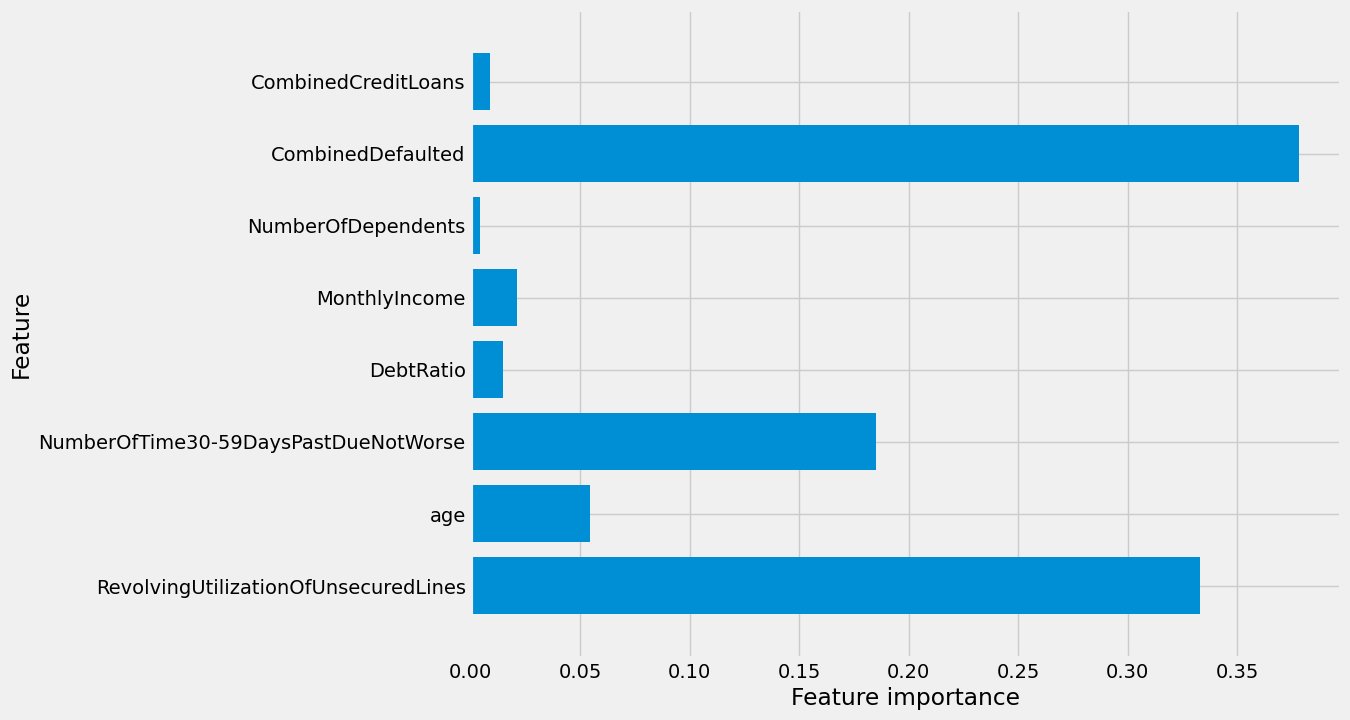

In [169]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

Now Let's try GradientBoostingClassifier!

AUC Score 0.9342593314071099


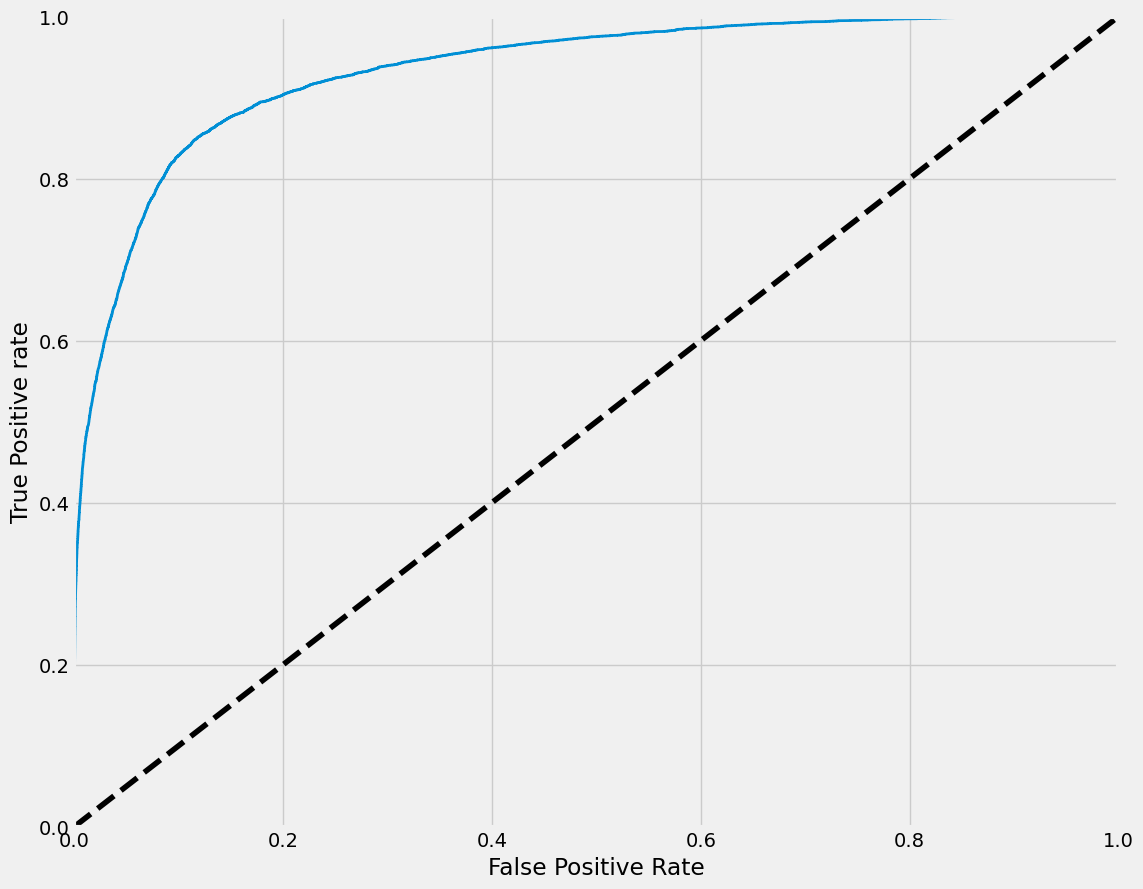

In [171]:
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(X_train,y_train)
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

In [173]:
#validation
gbc_val_proba = gbc_clf.predict_proba(X_val)
gbc_val_scores = gbc_val_proba[:,1]
print("AUC Score {}".format(roc_auc_score(y_val, gbc_val_scores)))

AUC Score 0.8534932883438237


We are overfitting! Let's try tuning the hyperparameters of our gradient boosting classifier to improve generalization.

In [175]:
gbc_clf_submission = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05 ,max_depth=4,  random_state=42)
gbc_clf_submission.fit(X_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
gbc_val_proba = gbc_clf_submission.predict_proba(X_val)
gbc_val_scores = gbc_val_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores))), print("AUC Score {}".format(roc_auc_score(y_val, gbc_val_scores)))

AUC Score 0.8659575939300126
AUC Score 0.8561747092625038


(None, None)

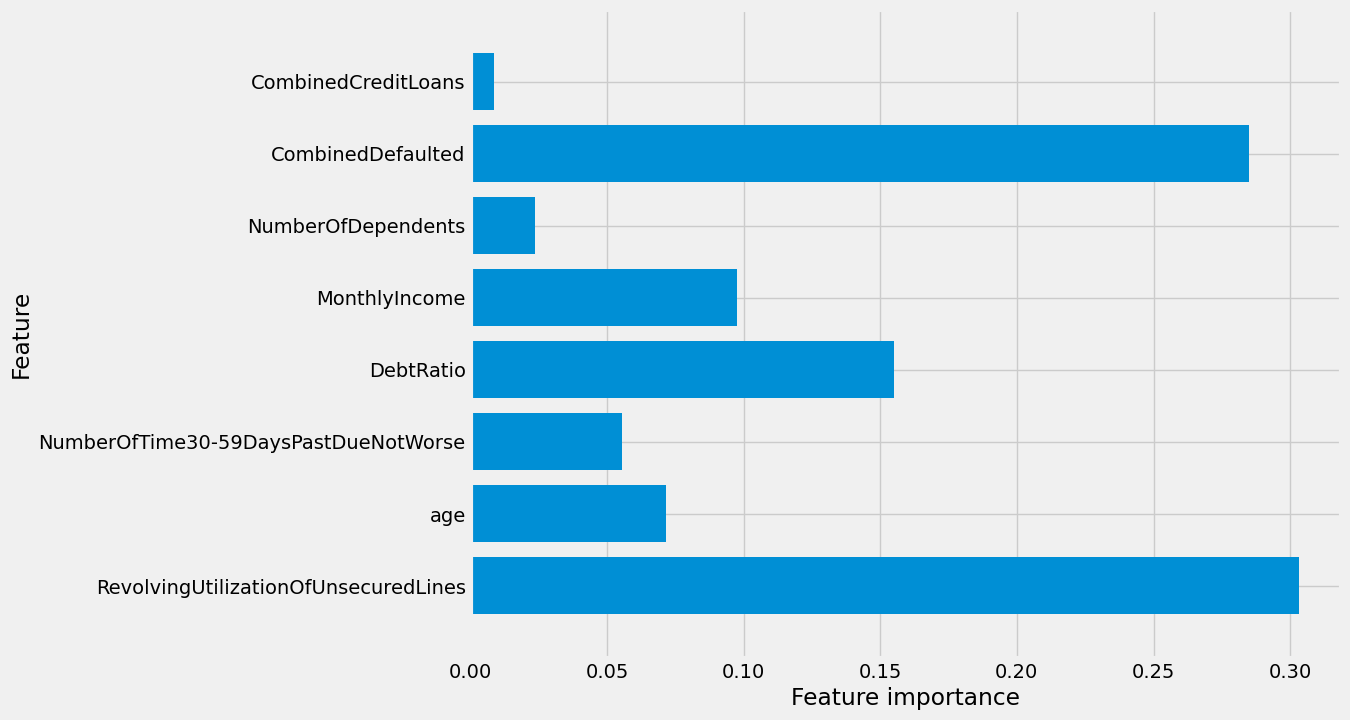

In [177]:
plot_feature_importances(gbc_clf)

Here, the GradientBoostingClassifier gives more emphasis on the RevolvingUtilizationOfUnsecuredLines feature and the DebtRatio, much more equally than the RandonForestClassifier. We're taking GradientBoostingClassifier as our model to submit on the kaggle competition.

In [179]:
X_test.shape

(101503, 8)

In [181]:
submission_proba = gbc_clf_submission.predict_proba(X_test)
submission_scores = submission_proba[:,1] #Positive Class

In [183]:
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission_credit.csv', index=False)